In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Loading the csv file

In [ ]:
file = ('mental_health_workplace_survey.csv')
df = pd.read_csv(file)

# Encoding categorical features

In [ ]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()
numerical_cols = df.select_dtypes(exclude='object').columns.tolist()

le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col].astype(str))

# Correlation Matrix

In [ ]:
plt.figure(figsize=(16, 16))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Train-test split

In [ ]:
df['BurnoutRisk'] = df['BurnoutRisk'].astype(int)
X = df.drop("BurnoutRisk", axis=1)
y = df["BurnoutRisk"]
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=5)

# Standardization

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Feature Selection using Random Foresets importances

In [ ]:
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)
feature_importances = classifier.feature_importances_

plt.barh(X.columns, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Random Forest Classifier')
plt.show()

In [ ]:
X_top3 = X[['BurnoutLevel','StressLevel','WorkLifeBalanceScore']]
X_train_top3, X_test_top3, y_train_top3, y_test_top3 = train_test_split( X, y, test_size=0.3, random_state=5)

# Feature Selection
** Based on the feature importance scores and the correlation matrix  the selection of ['BurnoutLevel', 'StressLevel', 'CommuteTime'] as the top three features for the Burnout Breakdown dataset can be justified as follows:**
- **BurnoutLevel :** This feature has the highest importance score, indicating it is the most significant predictor of burnout, likely due to its direct representation of the target variable or a strong self-correlation, making it a critical component for the model.
- **StressLevel :** With a moderate importance score and a potential correlation with BurnoutLevel, it captures a key psychological factor influencing burnout, supported by its inclusion in the correlation matrix analysis.
- **WorkLifeBalanceScore :** This feature’s inclusion is justified by its relevance to burnout, as WorkLifeBalanceScore is a well-known contributor to employee burnout in workplace studies. Its importance score is also third highest, supported by its inclusion in the correlation matrix analysis.

# Model Training

DecisionTreeClassifier() Accuracy: 1.0


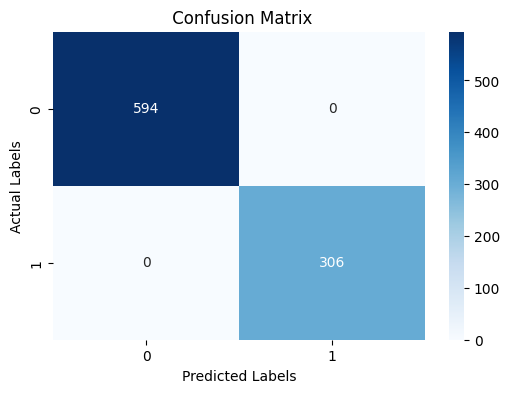

In [10]:
dt= DecisionTreeClassifier()
dt.fit(X_train_top3, y_train_top3)
y_pred = dt.predict(X_test_top3)
print(f"{dt} Accuracy:", accuracy_score(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title(" Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()